['Class', 'Results']
['Barbarian', '5']
['Bard', '4']
['Cleric', '10']
['Druid', '3']
['Fighter', '6']
['Monk', '5']
['Ranger', '2']
['Rogue', '1']
['Sorcerer', '9']
['Wizard', '5']
['Warlock', '8']


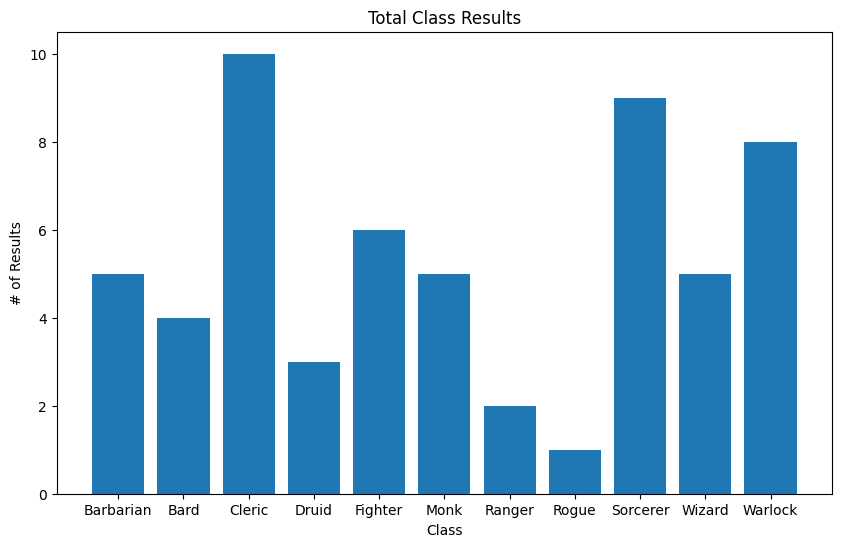

In [ ]:
import csv
from quiz_functions import *
from quiz_questions import *
from collections import Counter as ctr
import matplotlib.pyplot as plt

input_file = 'total_results.csv'
first_column = []
string_second_column = []
total_results = []
with open(input_file, mode = 'r') as infile:
    reader = csv.reader(infile)
    header = next(reader)
    
    for row in total_results:
        if row:
            first_column.append(row[0])
            string_second_column.append(row[1])
    
    del first_column[0]
    del string_second_column[0]

    int_second_column = []
    for x in string_second_column:
        int_second_column.append(int(x))

# Seperate user into one of four groups
user_group = grouping_function

chosen_questions = []
if(user_group == 'AA'):
    chosen_questions = physical_melee_questions
elif(user_group == 'AB'):
    chosen_questions = physical_range_questions
elif(user_group == 'BA'):
    chosen_questions = magical_melee_questions
else:
    chosen_questions = magical_range_questions

class_results = class_result_function(chosen_questions)

class_tally = ctr(class_results)
most_common = class_tally.most_common(1)[0][0]
print(f'Congratulations! You are most likely a: {most_common}')

for row in reader:
    if row[0] == most_common:
        row[1] = str(int(row[1] + 1))
    total_results.append(row)

with open(input_file, mode = 'w', newline= '') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(header)
    writer.writerow(total_results)

roll_stats

graph_results = str(input('Would you like to see a graph of the results of everyone that has taken this test?').upper())
while not(graph_results == 'Y' or graph_results == 'N'):
    print('Invalid input, please try again:\n')
    graph_results = str(input('Would you like to see a graph of the results of everyone that has taken this test?').upper())

if (graph_results == 'Y'):
    plt.figure(figsize=(10,6))
    plt.bar(first_column, int_second_column)
    plt.title('Total Class Results')
    plt.xlabel('Class')
    plt.ylabel('# of Results')
    plt.show()